In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt # rainplot
import pickle
import ipynb.fs.defs.functions as fct
from scipy import stats
import pandas as pd

In [134]:
all_users_folder = 'data/all_users/'

## Model 10

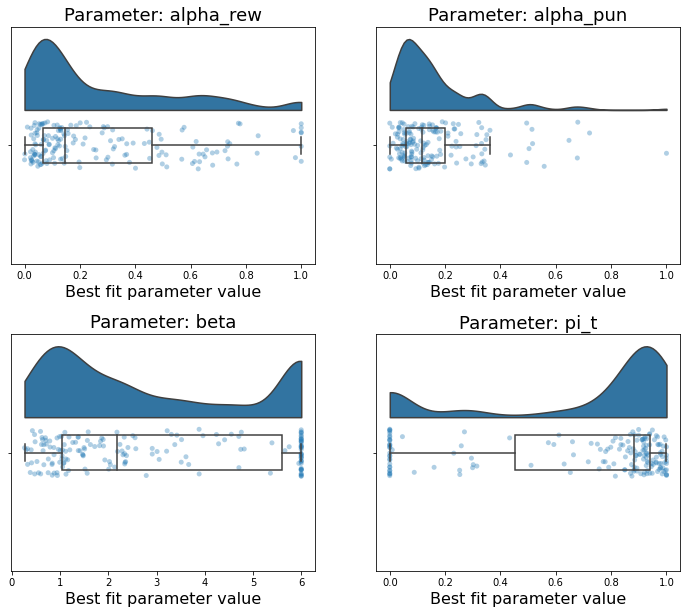

In [141]:
# Plot model parameters
model_folder = all_users_folder + 'mod10/'
data_mod = pd.read_pickle(model_folder+'mod_param_fits.pkl')
mod_info = pd.read_pickle(model_folder+'mod_parameters.pkl')
fct.plot_model_parameters(data_mod, mod_info['param_names'])

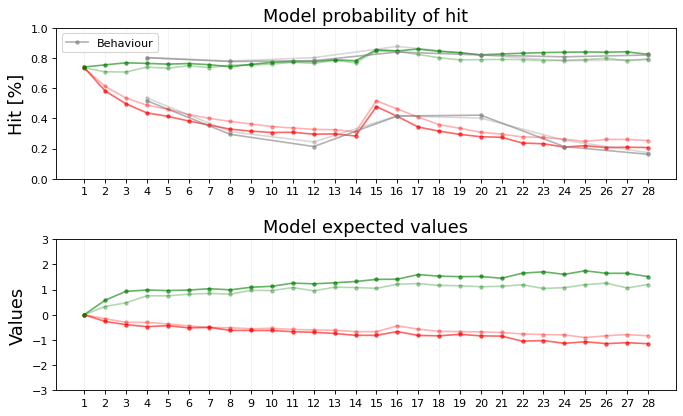

In [136]:
# Plot model predictions and behaviour
ev_per_trial = pd.read_pickle(all_users_folder + 'mod10/mod_ev_per_trial.pkl');
p_hit_per_trial = pd.read_pickle(all_users_folder + 'mod10/mod_p_hit_per_trial.pkl');
fct.fig_modelpred_on_behav(ev_per_trial, p_hit_per_trial, all_users_folder)

### Sliding average: Model

In [137]:
def get_slide_av_model_for_cue(cue, p_hit_per_trial):
    
    window_size = 4

    slide_avs_all = []

    # Loop
    for index, row in p_hit_per_trial[p_hit_per_trial['Cue']==cue].iterrows():

        hit_probs = row.values[1::]

        # Simulate behaviour (samples)
        samples = np.random.binomial(1, hit_probs.tolist(), len(hit_probs))

        # Parameters
        N_trials = len(samples)
        N_iter = int(N_trials/window_size)

        # Fill in df_single_part
        slide_avs = []

        for i in range(N_iter):

            # Select trials
            window_start = i*window_size
            window = samples[window_start:window_start+window_size]

            slide_av = window.sum()/window_size

            slide_avs.append(slide_av)

        slide_avs_all.append(slide_avs)

    df_slide_av = pd.DataFrame(slide_avs_all)
    slide_av_model = df_slide_av.mean()
    
    return slide_av_model

### Sliding average: behaviour

In [138]:
# Timepoints
window_size = 4*4
N_trials = 112
timepoints = ['t'+ str(t+1) for t in range(int(N_trials/window_size))]

# Load behaviour and compute stats
hit_perc_per_t = pd.read_pickle(all_users_folder + 'hit_perc_per_t/hit_perc_per_t_w' + str(window_size) + '.pkl');
hit_perc_per_t.drop('ID', axis=1, inplace=True);

### Plot

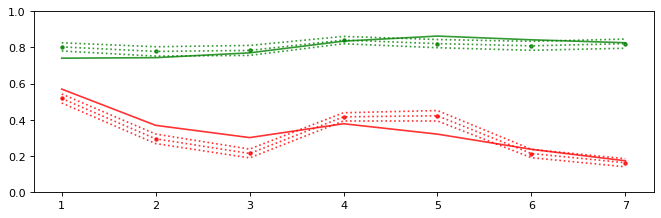

In [139]:
# Plot
f, ax = plt.subplots(1, 1, figsize=(10, 3), dpi=80)
x = range(1,8)


# HR
data_model = get_slide_av_model_for_cue('HR', p_hit_per_trial)
data_behav_mean = hit_perc_per_t.loc['Cue_HR'].mean()
data_behav_std = hit_perc_per_t.loc['Cue_HR'].std()
N_subj = len(hit_perc_per_t.loc['Cue_HR'])
# Simulations
p_m = ax.plot(x, data_model, '-', color='green', alpha=0.8);
# Behaviour mean
p_b = ax.plot(x, data_behav_mean, '.:', color='green', alpha=0.8);
# Behaviour SEM
p_s = ax.plot(x, data_behav_mean-data_behav_std/np.sqrt(N_subj), ':', color='green', alpha=0.8);
p_s = ax.plot(x, data_behav_mean+data_behav_std/np.sqrt(N_subj), ':', color='green', alpha=0.8);

# HP
data_model = get_slide_av_model_for_cue('HP', p_hit_per_trial)
data_behav_mean = hit_perc_per_t.loc['Cue_HP'].mean()
data_behav_std = hit_perc_per_t.loc['Cue_HP'].std()
N_subj = len(hit_perc_per_t.loc['Cue_HP'])
# Simulations
p_m = ax.plot(x, data_model, '-', color='red', alpha=0.8);
# Behaviour mean
p_b = ax.plot(x, data_behav_mean, '.:', color='red', alpha=0.8);
# Behaviour SEM
p_s = ax.plot(x, data_behav_mean-data_behav_std/np.sqrt(N_subj), ':', color='red', alpha=0.8);
p_s = ax.plot(x, data_behav_mean+data_behav_std/np.sqrt(N_subj), ':', color='red', alpha=0.8);

plt.ylim([0, 1])
plt.show()

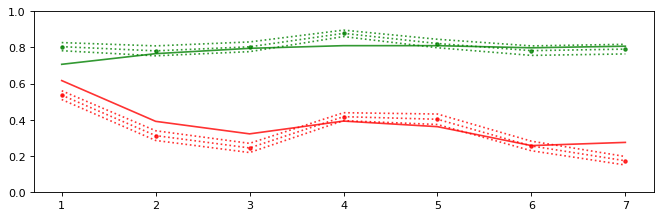

In [140]:
# Plot
f, ax = plt.subplots(1, 1, figsize=(10, 3), dpi=80)
x = range(1,8)


# LR
data_model = get_slide_av_model_for_cue('LR', p_hit_per_trial)
data_behav_mean = hit_perc_per_t.loc['Cue_LR'].mean()
data_behav_std = hit_perc_per_t.loc['Cue_LR'].std()
N_subj = len(hit_perc_per_t.loc['Cue_LR'])
# Simulations
p_m = ax.plot(x, data_model, '-', color='green', alpha=0.8);
# Behaviour mean
p_b = ax.plot(x, data_behav_mean, '.:', color='green', alpha=0.8);
# Behaviour SEM
p_s = ax.plot(x, data_behav_mean-data_behav_std/np.sqrt(N_subj), ':', color='green', alpha=0.8);
p_s = ax.plot(x, data_behav_mean+data_behav_std/np.sqrt(N_subj), ':', color='green', alpha=0.8);

# LP
data_model = get_slide_av_model_for_cue('LP', p_hit_per_trial)
data_behav_mean = hit_perc_per_t.loc['Cue_LP'].mean()
data_behav_std = hit_perc_per_t.loc['Cue_LP'].std()
N_subj = len(hit_perc_per_t.loc['Cue_LP'])
# Simulations
p_m = ax.plot(x, data_model, '-', color='red', alpha=0.8);
# Behaviour mean
p_b = ax.plot(x, data_behav_mean, '.:', color='red', alpha=0.8);
# Behaviour SEM
p_s = ax.plot(x, data_behav_mean-data_behav_std/np.sqrt(N_subj), ':', color='red', alpha=0.8);
p_s = ax.plot(x, data_behav_mean+data_behav_std/np.sqrt(N_subj), ':', color='red', alpha=0.8);

plt.ylim([0, 1])
plt.show()